<a href="https://colab.research.google.com/github/pscabral/IFMA_Softex/blob/main/VGG16_PRD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
%matplotlib inline
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [3]:
train_dir='/content/train'
test_dir='/content/test/'

In [4]:
traindf=pd.DataFrame(columns=['img_path','class'])
test_df=pd.DataFrame(columns=['img_path','class'])

In [7]:
traindf = pd.DataFrame(columns=['img_path', 'class'])

for className in os.listdir(train_dir):
    for filename in os.listdir(os.path.join(train_dir, className)):
        img_path = os.path.join(train_dir, className, filename)
        data_to_append = pd.DataFrame({'img_path': [img_path], 'class': [className]})
        traindf = pd.concat([traindf, data_to_append], ignore_index=True)

In [8]:
test_df = pd.DataFrame(columns=['img_path', 'class'])

for className in os.listdir(test_dir):
    for filename in os.listdir(os.path.join(test_dir, className)):
        img_path = os.path.join(test_dir, className, filename)
        data_to_append = pd.DataFrame({'img_path': [img_path], 'class': [className]})
        test_df = pd.concat([test_df, data_to_append], ignore_index=True)


In [ ]:
train_df,valid_df=train_test_split(traindf,test_size=0.1,random_state=0)
len(train_df), len(test_df), len(valid_df)

In [ ]:
print(train_df.info())

In [ ]:
print(train_df.head())

In [ ]:
print(test_df.info())

In [ ]:
print(valid_df.info())

In [ ]:
tf=train_df['class'].value_counts().to_frame().reset_index()
tf.rename(columns={"index": "class", "class": "train_counts"},inplace=True)
tf1=test_df['class'].value_counts().to_frame().reset_index()
tf1.rename(columns={"index": "class", "class": "test_counts"},inplace=True)
tf2=valid_df['class'].value_counts().to_frame().reset_index()
tf2.rename(columns={"index": "class", "class": "valid_counts"},inplace=True)
df=pd.merge(tf,tf1,on='class')
df=pd.merge(df,tf2,on='class')
df

In [ ]:
plt.figure(figsize=(20,30))
g=sns.countplot(y='class',data=train_df)
#g.set_xticklabels(g.get_xticklabels(), rotation=90)

In [ ]:
tf=train_df['class'].value_counts()[:10]
tf=tf.to_frame().reset_index()
tf.rename(columns={"index": "class", "class": "counts"},inplace=True)
plt.figure(figsize=(15,5))
g=sns.barplot(x='class',y='counts',data=tf)

In [ ]:
tf=train_df['class'].value_counts()[-11:-1]
tf=tf.to_frame().reset_index()
tf.rename(columns={"index": "class", "class": "counts"},inplace=True)
plt.figure(figsize=(15,5))
g=sns.barplot(x='class',y='counts',data=tf)

In [ ]:
tf=test_df['class'].value_counts()[:10]
tf=tf.to_frame().reset_index()
tf.rename(columns={"index": "class", "class": "counts"},inplace=True)
plt.figure(figsize=(20,5))
g=sns.barplot(x='class',y='counts',data=tf)

In [ ]:
tf=test_df['class'].value_counts()[-10:-1]
tf=tf.to_frame().reset_index()
tf.rename(columns={"index": "class", "class": "counts"},inplace=True)
plt.figure(figsize=(15,5))
g=sns.barplot(x='class',y='counts',data=tf)

In [29]:
img_index = 0  # Índice da imagem desejada

if 0 <= img_index < len(train_df):
    img_path = train_df['img_path'].iloc[img_index]
    img = cv2.imread(img_path)

    if img is not None:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        print(f'O tamanho da imagem é {img.shape}')
    else:
        print(f'Não foi possível carregar a imagem em {img_path}')
else:
    print(f'Índice {img_index} fora do intervalo válido para o DataFrame.')

O tamanho da imagem é (256, 256, 3)


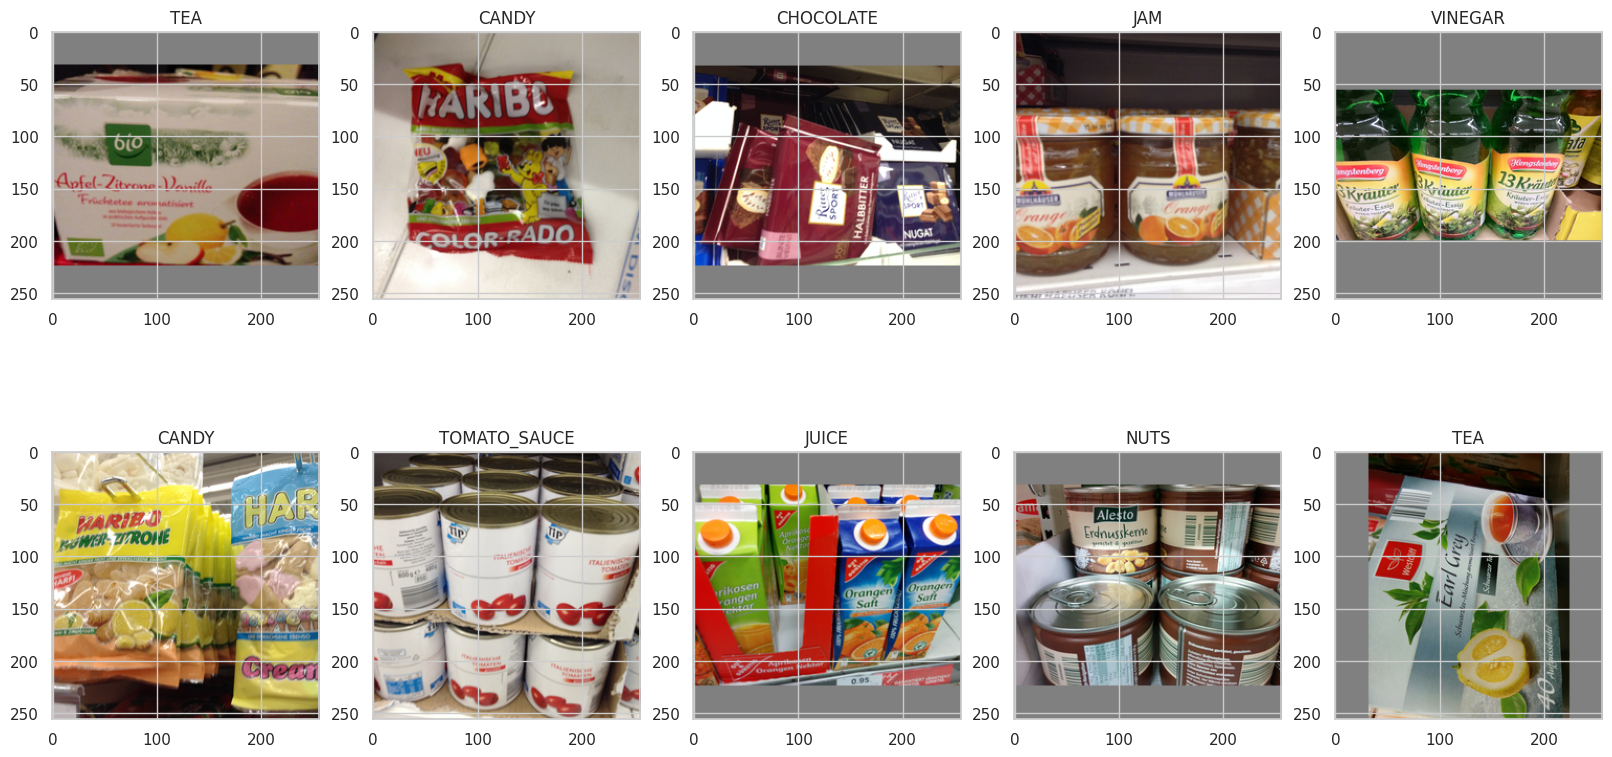

In [33]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))

for i in range(10):
    rand_int = np.random.randint(0, len(train_df))
    img = cv2.imread(train_df['img_path'].iloc[rand_int])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.subplot(2, 5, i + 1)
    plt.imshow(img)
    plt.title(train_df['class'].iloc[rand_int])

plt.show()


In [ ]:
fig,axes=plt.subplots(1,3,figsize=(15,5))
g1=sns.histplot(data=img[:,:,0].ravel(),ax=axes[0])
g2=sns.histplot(data=img[:,:,1].ravel(),ax=axes[1])
g3=sns.histplot(data=img[:,:,2].ravel(),ax=axes[2])

In [ ]:
train_df.head(100)

In [38]:
train_datagen=ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)

train_generator=train_datagen.flow_from_dataframe(
dataframe=train_df,
x_col="img_path",
y_col='class',
batch_size=32,
seed=42,
shuffle=True,
class_mode="categorical",target_size=(224,224))

validation_generator=train_datagen.flow_from_dataframe(
dataframe=valid_df,
x_col="img_path",
y_col='class',
batch_size=32,
seed=42,
shuffle=True,
class_mode="categorical",target_size=(224,224))

test_generator=test_datagen.flow_from_dataframe(
dataframe=test_df,
x_col="img_path",
y_col='class',
batch_size=1,
seed=42,
shuffle=True,
class_mode="categorical",target_size=(224,224))

Found 3722 validated image filenames belonging to 25 classes.
Found 414 validated image filenames belonging to 25 classes.
Found 1768 validated image filenames belonging to 25 classes.


In [39]:
train_generator.image_shape

(224, 224, 3)

In [ ]:
img1=train_generator.next()[0]
fig=plt.imshow(img1[0,:,:,:])

In [41]:
from keras.applications.vgg16 import VGG16, preprocess_input
from keras import layers
from keras.models import Model
from keras.callbacks import EarlyStopping
import keras

In [42]:
model=VGG16(input_shape=(224,224,3), weights='imagenet')
earlystopping = EarlyStopping(monitor='val_loss', mode='min',verbose=1, patience=3 )

553467096/553467096 [==============================] - 8s 0us/step


In [43]:
for layer in model.layers[:-1]:
    layer.trainable=False
#for layer in model.layers[15:]:
    #layer.trainable=True

In [ ]:
model.summary()

In [57]:
pretrained_last_layer=model.get_layer(name=model.layers[-2].name)
pretrained_output=pretrained_last_layer.output
next_layer= layers.Dense(25, activation='softmax')(pretrained_output)
pretrained_vgg = Model(model.input, next_layer)

In [ ]:
pretrained_vgg.summary()

In [59]:
pretrained_vgg.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam() ,metrics=['accuracy'])

In [ ]:
batch_size=64
history=pretrained_vgg.fit(train_generator,validation_data=validation_generator,epochs=8,callbacks=earlystopping)

Epoch 1/8
117/117 [==============================] - 2224s 19s/step - loss: 2.9620 - accuracy: 0.1808 - val_loss: 2.6662 - val_accuracy: 0.2657
Epoch 2/8
 20/117 [====>.........................] - ETA: 27:46 - loss: 2.5938 - accuracy: 0.2594